# Dataset
The data is related with direct marketing campaigns (phone calls) of a banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).
This dataset provides the customer information. It includes 41188 records and 21 fields.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/bank.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(21208, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0


## Input variables
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

## Predict variable (desired target):
y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [4]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Let's group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [5]:
import numpy as np

data['education']=np.where(data['education'] =='basic.9y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'basic', data['education'])

# Data Exploration

In [6]:
data['y'].value_counts()

y
0.0    18778
1.0     2430
Name: count, dtype: int64

/tmp/ipykernel_679496/518574590.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette = "Set2")


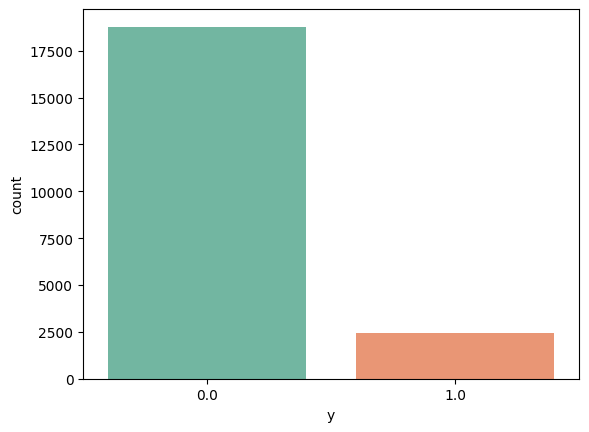

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=data, palette = "Set2")
plt.show()

There are 18778 no's and 2430 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [8]:
data.groupby('y').mean(numeric_only =True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0.0,39.925019,220.138460,2.626158,985.260677,0.133081,0.243306,93.605879,-40.567190,3.803670,5175.711332
1.0,40.852263,553.764198,2.012346,790.969959,0.490947,-1.211276,93.374816,-39.946708,2.132847,5095.281399


# Create dummy variables

In [9]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [10]:
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [11]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

# Feature Selection
Select useful features for training model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE # Recursive Feature Elimination

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20) # Select 20 best features
rfe = rfe.fit(data_final[X], data_final[y])
print(rfe.support_)
print(rfe.ranking_)

/home/quanna/Desktop/envs/profile/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/quanna/Desktop/envs/profile/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/quanna/Desktop/envs/profile/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

[False False False False  True False False False  True False  True False
 False False False  True False False  True False False False  True False
 False False  True  True False False False False False  True False False
 False  True False False False False  True False False False  True  True
  True  True False  True False False  True False False False  True  True
  True]
[25 23  4 28  1 11 16 13  1 21  1  3 31 22 38  1  2 15  1  9 29 24  1 19
 14 37  1  1 36  5 20  8  6  1 42 10 40  1 33 41 35 12  1 26  7 32  1  1
  1  1 27  1 39 34  1 18 17 30  1  1  1]


/home/quanna/Desktop/envs/profile/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
data_final.columns.to_list().remove('y')

In [14]:
list_X = data_final.columns.to_list()
list_X.remove('y')
len(list_X)

61

In [15]:
selected_X = [a for a, b in zip(list_X, rfe.support_) if b]
selected_X

['previous',
 'euribor3m',
 'job_admin.',
 'job_retired',
 'job_student',
 'marital_divorced',
 'education_basic',
 'education_high.school',
 'default_unknown',
 'housing_yes',
 'contact_telephone',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'day_of_week_mon',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [16]:
X = data_final[selected_X]
y = data_final['y']

# Train model

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression()

# Cross Validation

In [18]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(logreg, X_train, y_train, cv=kfold, scoring="accuracy")
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.896


# Predict

In [19]:
y_pred = logreg.predict(X_test)

# Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[5590,   67],
       [ 565,  141]])

# Accuracy

In [21]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(cfm.diagonal().sum()/cfm.sum()))

Accuracy of logistic regression classifier on test set: 0.90


# Different Metrics

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      5657
         1.0       0.68      0.20      0.31       706

    accuracy                           0.90      6363
   macro avg       0.79      0.59      0.63      6363
weighted avg       0.88      0.90      0.88      6363



# ROC Curve

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

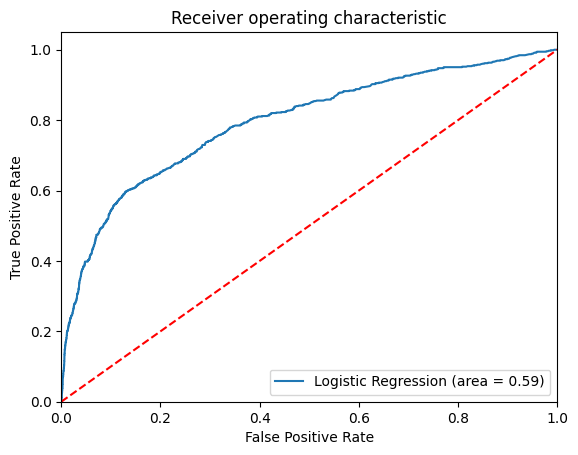

In [24]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")